### Report

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv("data/cox-violent-parsed_filt_processed.csv")
df.head()

,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,...,r_jail_in,violent_recid,is_violent_recid,vr_charge_degree,vr_offense_date,score_text,screening_date,v_decile_score,v_score_text,event
0,Male,69,Greater than 45,Other,0,1,0,0,0,-1.0,...,NaN,NaN,0,NaN,NaN,Low,14/08/2013,1,Low,0
1,Male,31,25 - 45,Caucasian,0,5,0,0,0,NaN,...,NaN,NaN,0,NaN,NaN,Medium,31/12/2014,2,Low,0
2,Male,34,25 - 45,African-American,0,3,0,0,0,-1.0,...,NaN,NaN,1,(F3),05/07/2013,Low,27/01/2013,1,Low,1
3,Male,24,Less than 25,African-American,0,4,0,1,4,-1.0,...,16/06/2013,NaN,0,NaN,NaN,Low,14/04/2013,3,Low,0
4,Male,23,Less than 25,African-American,0,8,1,0,1,NaN,...,NaN,NaN,0,NaN,NaN,High,13/01/2013,6,Medium,0


In [3]:
# Set Seaborn style
sns.set(style="whitegrid")

In [4]:
df.columns

Index(['sex', 'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
       'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date', 'r_jail_in',
       'violent_recid', 'is_violent_recid', 'vr_charge_degree',
       'vr_offense_date', 'score_text', 'screening_date', 'v_decile_score',
       'v_score_text', 'event'],
      dtype='object')

In [5]:
df.drop('age_cat', axis=1)
df.drop('c_charge_degree', axis=1)
df.drop('violent_recid', axis=1)


,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,...,r_offense_date,r_jail_in,is_violent_recid,vr_charge_degree,vr_offense_date,score_text,screening_date,v_decile_score,v_score_text,event
0,Male,69,Greater than 45,Other,0,1,0,0,0,-1.0,...,NaN,NaN,0,NaN,NaN,Low,14/08/2013,1,Low,0
1,Male,31,25 - 45,Caucasian,0,5,0,0,0,NaN,...,NaN,NaN,0,NaN,NaN,Medium,31/12/2014,2,Low,0
2,Male,34,25 - 45,African-American,0,3,0,0,0,-1.0,...,05/07/2013,NaN,1,(F3),05/07/2013,Low,27/01/2013,1,Low,1
3,Male,24,Less than 25,African-American,0,4,0,1,4,-1.0,...,16/06/2013,16/06/2013,0,NaN,NaN,Low,14/04/2013,3,Low,0
4,Male,23,Less than 25,African-American,0,8,1,0,1,NaN,...,NaN,NaN,0,NaN,NaN,High,13/01/2013,6,Medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,Male,23,Less than 25,African-American,0,3,0,0,0,-1.0,...,NaN,NaN,0,NaN,NaN,Low,01/02/2014,5,Medium,0
10995,Female,31,25 - 45,African-American,0,6,0,0,5,-1.0,...,NaN,NaN,0,NaN,NaN,Medium,29/12/2014,4,Low,0
10996,Male,57,Greater than 45,Other,0,1,0,0,0,-1.0,...,NaN,NaN,0,NaN,NaN,Low,14/01/2014,1,Low,0
10997,Female,33,25 - 45,African-American,0,2,0,0,3,-1.0,...,NaN,NaN,0,NaN,NaN,Low,09/03/2014,2,Low,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex                      10999 non-null  object 
 1   age                      10999 non-null  int64  
 2   age_cat                  10999 non-null  object 
 3   race                     10999 non-null  object 
 4   juv_fel_count            10999 non-null  int64  
 5   decile_score             10999 non-null  int64  
 6   juv_misd_count           10999 non-null  int64  
 7   juv_other_count          10999 non-null  int64  
 8   priors_count             10999 non-null  int64  
 9   days_b_screening_arrest  9903 non-null   float64
 10  c_jail_in                9903 non-null   object 
 11  c_jail_out               9903 non-null   object 
 12  c_days_from_compas       10309 non-null  float64
 13  c_charge_degree          10309 non-null  object 
 14  c_charge_desc         

In [7]:
# Data Overview
print(f"Dataset Shape: {df.shape}")
print(f"Summary Statistics\n: {df.describe(include="all")}")

Dataset Shape: (10999, 29)
Summary Statistics
:           sex           age  age_cat              race  juv_fel_count  \
count   10999  10999.000000    10999             10999   10999.000000   
unique      2           NaN        3                 6            NaN   
top      Male           NaN  25 - 45  African-American            NaN   
freq     8742           NaN     6221              5444            NaN   
mean      NaN     35.112647      NaN               NaN       0.061096   
std       NaN     12.027804      NaN               NaN       0.451195   
min       NaN     18.000000      NaN               NaN       0.000000   
25%       NaN     25.000000      NaN               NaN       0.000000   
50%       NaN     32.000000      NaN               NaN       0.000000   
75%       NaN     43.000000      NaN               NaN       0.000000   
max       NaN     96.000000      NaN               NaN      20.000000   

        decile_score  juv_misd_count  juv_other_count  priors_count  \
coun

In [8]:
# Check class imbalance
df["is_recid"].value_counts()

is_recid
 0    6858
 1    3473
-1     668
Name: count, dtype: int64

### Distributions

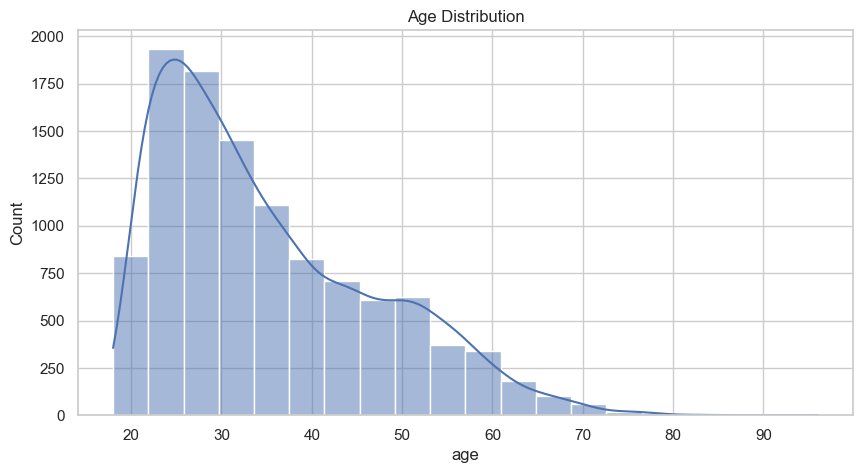

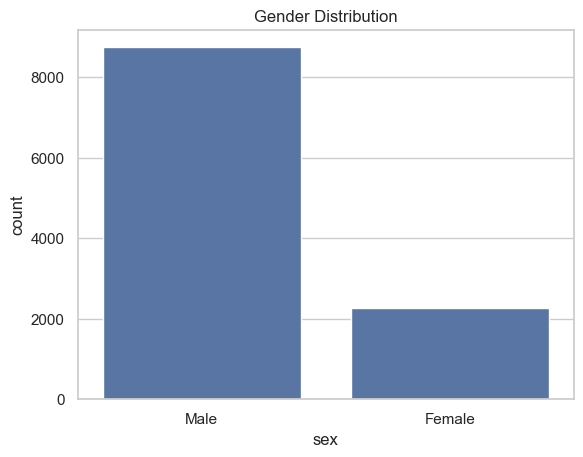

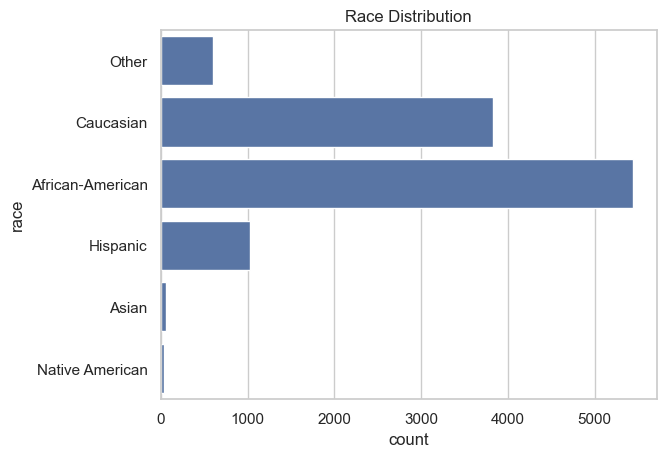

In [9]:
plt.figure(figsize=(10, 5))

sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

sns.countplot(x="sex", data=df)
plt.title('Gender Distribution')
plt.show()

sns.countplot(y='race', data=df)
plt.title("Race Distribution")
plt.show()

<Figure size 1200x600 with 0 Axes>

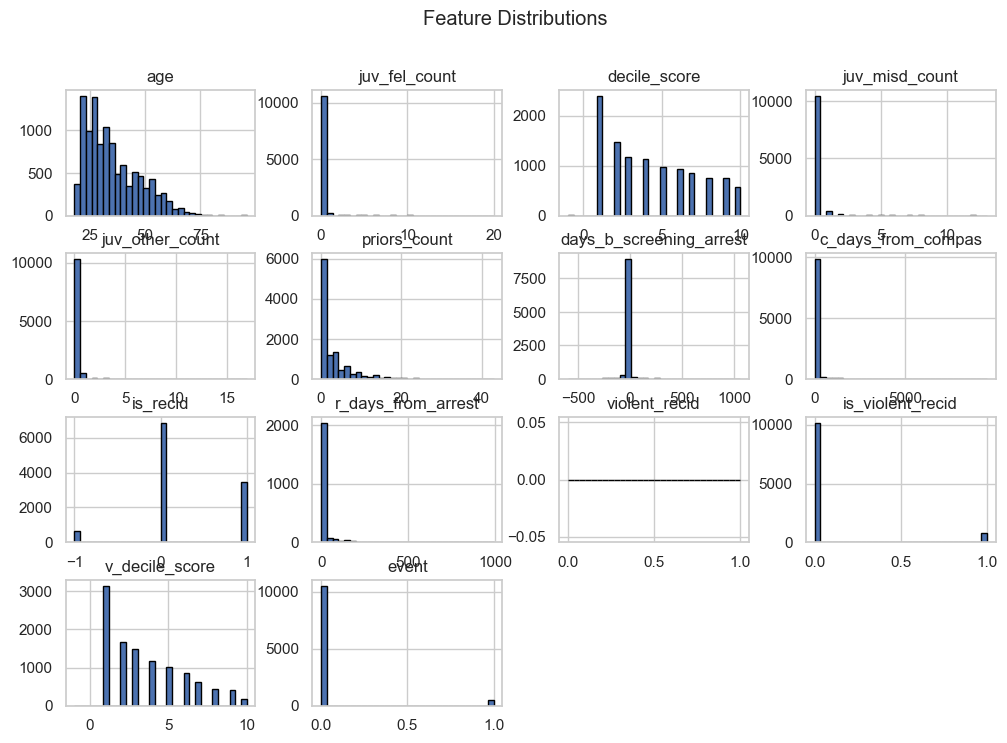

In [10]:
# Distribution Analysis
plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

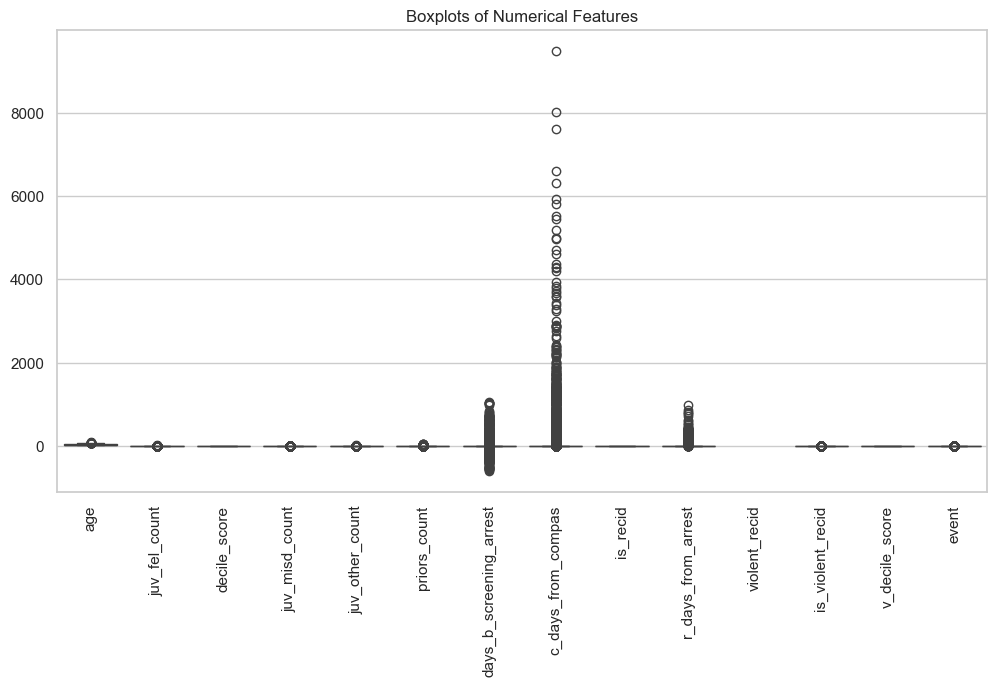

In [11]:
# Boxplot to check for outliers in numerical mcolumns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))  
plt.xticks(rotation=90)
plt.title("Boxplots of Numerical Features")
plt.show()

In [12]:
# Convert categorical columns (if needed)
categorical_cols = df.select_dtypes(include=["object"]).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

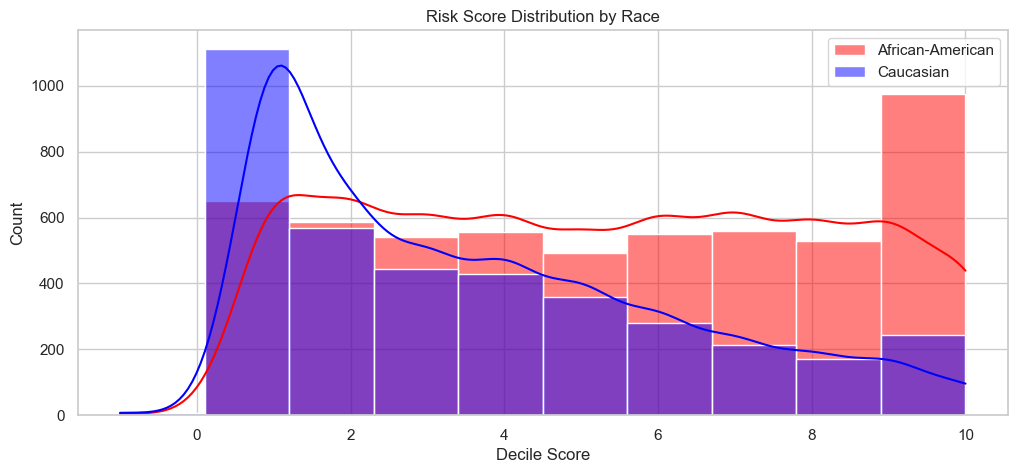

In [13]:
# Fairness & Bias Checks
plt.figure(figsize=(12, 5))
sns.histplot(df[df['race'] == "African-American"]["decile_score"], bins=10, color="red", label="African-American", kde=True)
sns.histplot(df[df["race"] == "Caucasian"]["decile_score"], bins=10, color="blue", label="Caucasian", kde=True)
plt.legend()
plt.title("Risk Score Distribution by Race")
plt.xlabel("Decile Score")
plt.show()

#### Investigate bias in scores

In [14]:
# Recidivism rate by race
recidivism_rates = df.groupby("race")["is_recid"].mean()
print(f"Recidivism rate by race: {recidivism_rates}")

Recidivism rate by race: race
African-American    0.320720
Asian               0.107143
Caucasian           0.202350
Hispanic            0.157741
Native American     0.194444
Other               0.179868
Name: is_recid, dtype: float64


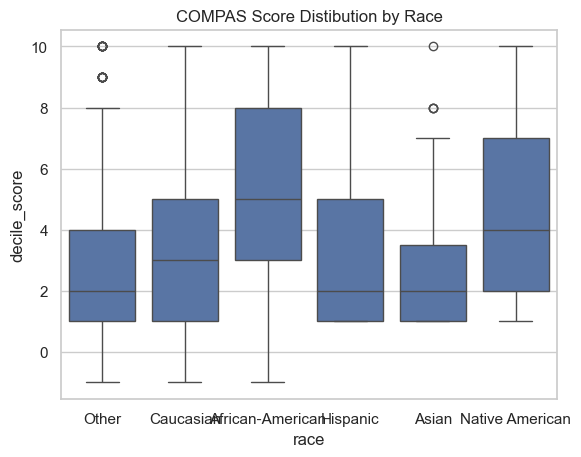

In [15]:
# Risk score distribution by race
sns.boxplot(x="race", y="decile_score", data=df)
plt.title("COMPAS Score Distibution by Race")
plt.show()

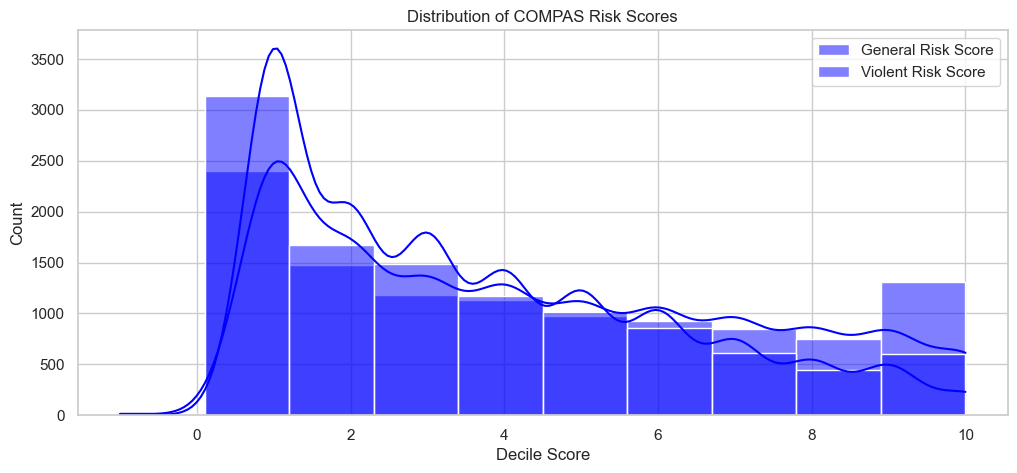

In [16]:
# Histogram of COMPAS Risk Scores
plt.figure(figsize=(12, 5))
sns.histplot(df["decile_score"], bins=10, kde=True, color='blue', label='General Risk Score')
sns.histplot(df["v_decile_score"], bins=10, kde=True, color='blue', label='Violent Risk Score')
plt.xlabel("Decile Score")
plt.ylabel("Count")
plt.title("Distribution of COMPAS Risk Scores")
plt.legend()
plt.show()

Most individuals have lower risk scores, but a significant number receive high scores, showing a skewed distribution.

C:\Users\timio\AppData\Local\Temp\ipykernel_7928\821089158.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="race", y="is_recid", data=df, ci=None, palette="Set2")
C:\Users\timio\AppData\Local\Temp\ipykernel_7928\821089158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="race", y="is_recid", data=df, ci=None, palette="Set2")


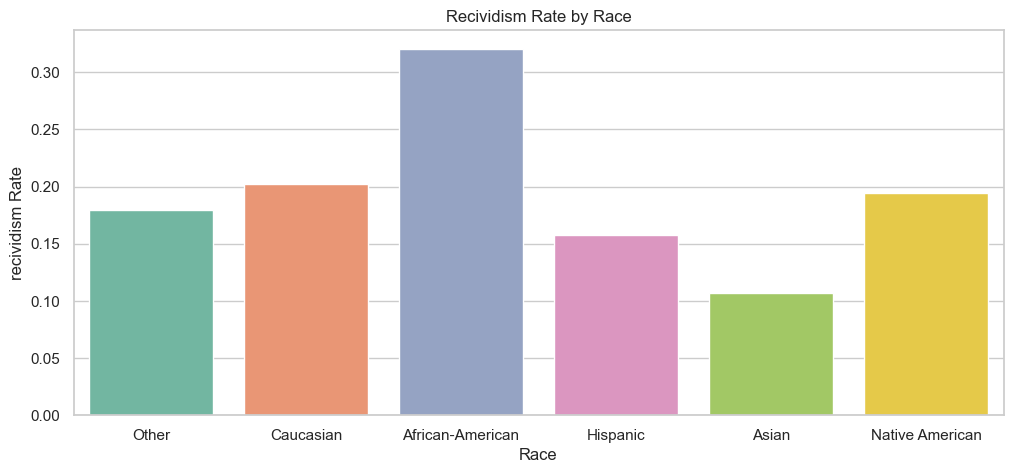

In [17]:
# Recividism rate by Race, Age category, and Sex
plt.figure(figsize=(12,5))
sns.barplot(x="race", y="is_recid", data=df, ci=None, palette="Set2")
plt.xlabel("Race")
plt.ylabel("recividism Rate")
plt.title("Recividism Rate by Race")
plt.show()

Recidivism rates vary by demographics, potentially revealing disparities across racial groups.

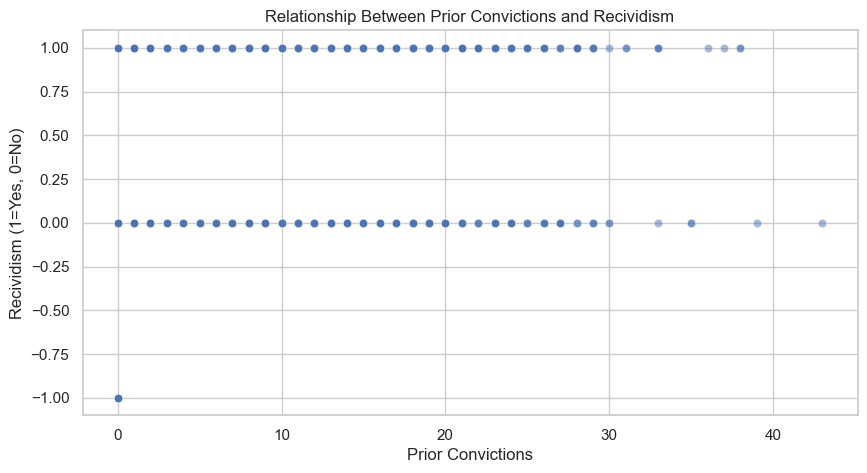

In [18]:
# Scatter Plot of Prioir Convictions vs Recividism
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["priors_count"], y=df["is_recid"], alpha=0.5)
plt.xlabel("Prior Convictions")
plt.ylabel("Recividism (1=Yes, 0=No)")
plt.title("Relationship Between Prior Convictions and Recividism")
plt.show()

Individuals with more prior offenses tend to have higher recidivism rates, showing a positive correlation.

C:\Users\timio\AppData\Local\Temp\ipykernel_7928\2661790000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["is_recid"], y=df["decile_score"], palette="coolwarm")


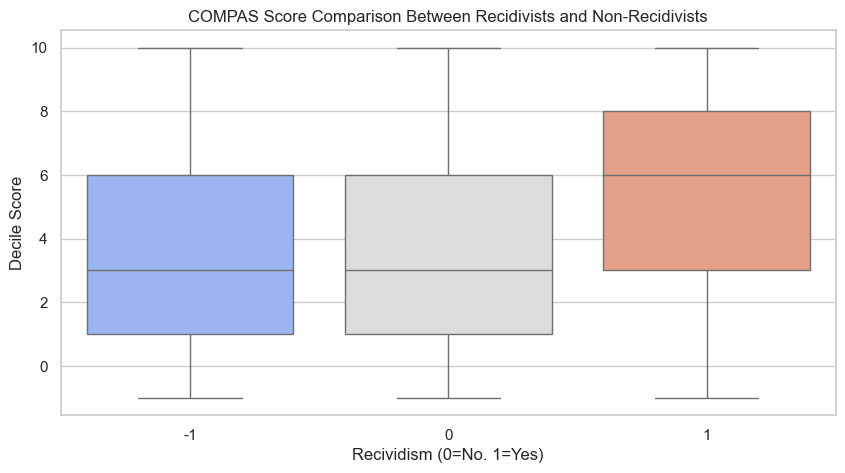

In [19]:
# Box plot comparing risk scores for Recidivists vs Non-Recidivists
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["is_recid"], y=df["decile_score"], palette="coolwarm")
plt.xlabel("Recividism (0=No. 1=Yes)")
plt.ylabel("Decile Score")
plt.title("COMPAS Score Comparison Between Recidivists and Non-Recidivists")
plt.show()

Recidivists tend to have higher COMPAS scores, but there is overlap, indicating possible misclassification.

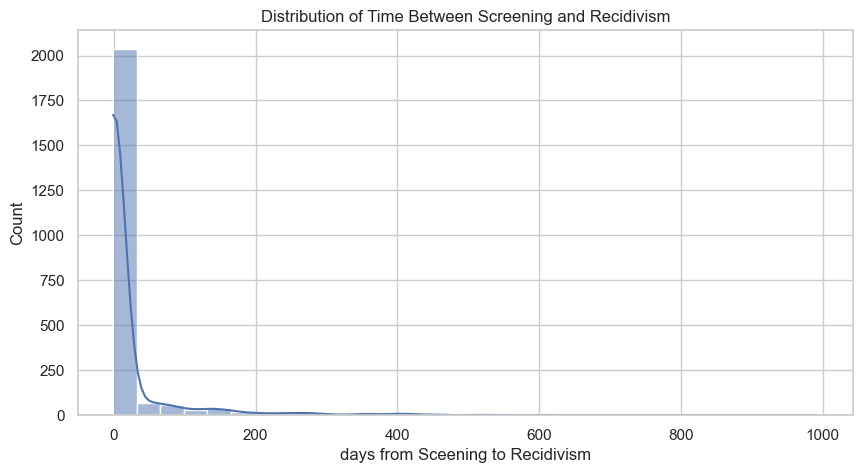

In [20]:
# Histogram of Time Between Screening and Recidivism
plt.figure(figsize=(10, 5))
sns.histplot(df["r_days_from_arrest"].dropna(), bins=30, kde=True)
plt.xlabel("days from Sceening to Recidivism")
plt.ylabel("Count")
plt.title("Distribution of Time Between Screening and Recidivism")
plt.show()

Many recidivists reoffend within a short period after screening, suggesting early intervention is crucial.

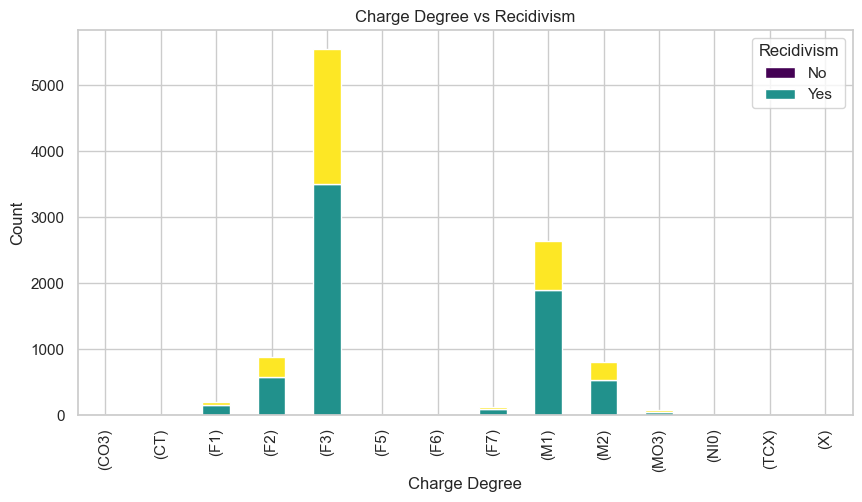

In [21]:
# Stacked Bar Chart of Charge Degree vs Recidivism
df_charge = df.groupby(["c_charge_degree", "is_recid"]).size().unstack()
df_charge.plot(kind="bar", stacked=True, figsize=(10, 5), colormap='viridis')
plt.xlabel("Charge Degree")
plt.ylabel("Count")
plt.title('Charge Degree vs Recidivism')
plt.legend(title="Recidivism", labels=["No", "Yes"])
plt.show()

People with more severe initial charges may have higher recidivism rates, but lower-charge individuals also recidivate.

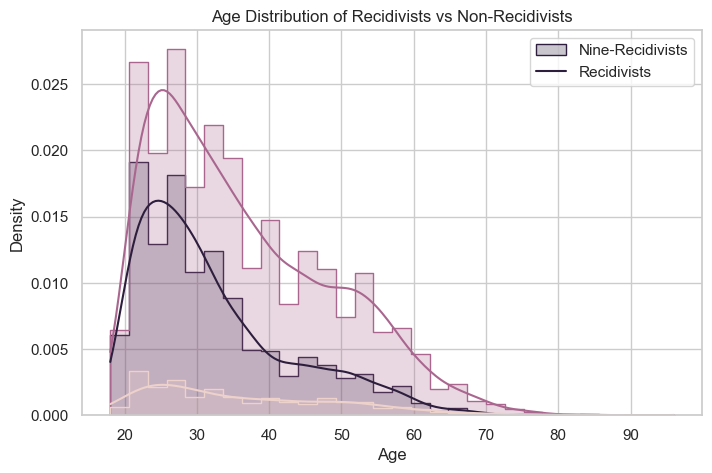

In [22]:
# Distribution of Age Among Recidivists and Non-Recidivists
plt.figure(figsize=(8, 5))
sns.histplot(df, x="age", hue="is_recid", kde=True, bins=30, element="step", stat="density")
plt.title("Age Distribution of Recidivists vs Non-Recidivists")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(["Nine-Recidivists", "Recidivists"])
plt.show()

Shows whether younger or older individuals are more likely to reoffend.

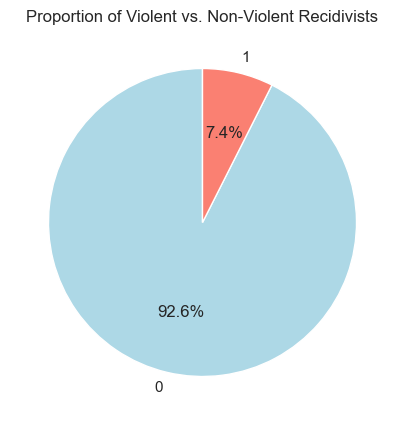

In [23]:
# Proportion of Violent vs Non-Violent Recidivists
plt.figure(figsize=(5,5))
df["is_violent_recid"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["lightblue", "salmon"])
plt.title("Proportion of Violent vs. Non-Violent Recidivists")
plt.ylabel("")
plt.show()

Highlights the ratio of violent to non-violent recidivism.

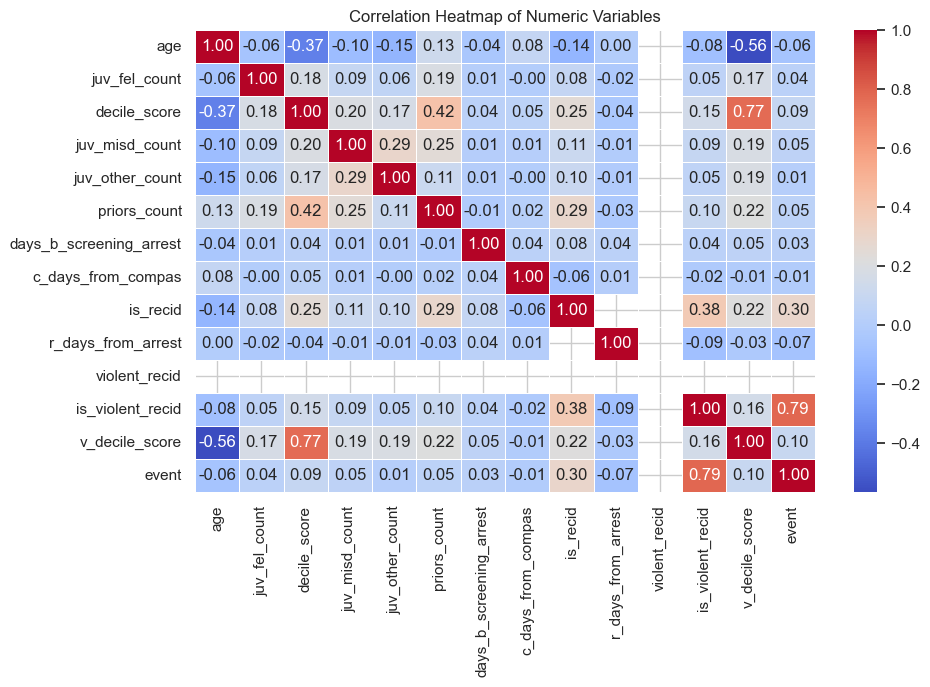

In [24]:
# Heatmap of Correlations Between Numeric Variables
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

Identifies strong relationships between variables like prior convictions, risk scores, and recidivism.

C:\Users\timio\AppData\Local\Temp\ipykernel_7928\1538956802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="race", y="decile_score", inner="quartile", palette="muted")


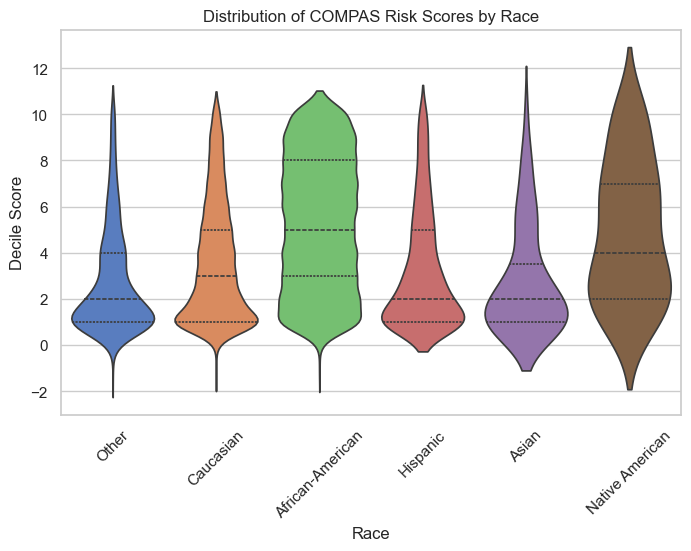

In [25]:
# Violin Plot of Risk Scores by Race
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="race", y="decile_score", inner="quartile", palette="muted")
plt.title("Distribution of COMPAS Risk Scores by Race")
plt.xlabel("Race")
plt.ylabel("Decile Score")
plt.xticks(rotation=45)
plt.show()

Shows the distribution of COMPAS scores across different racial groups.

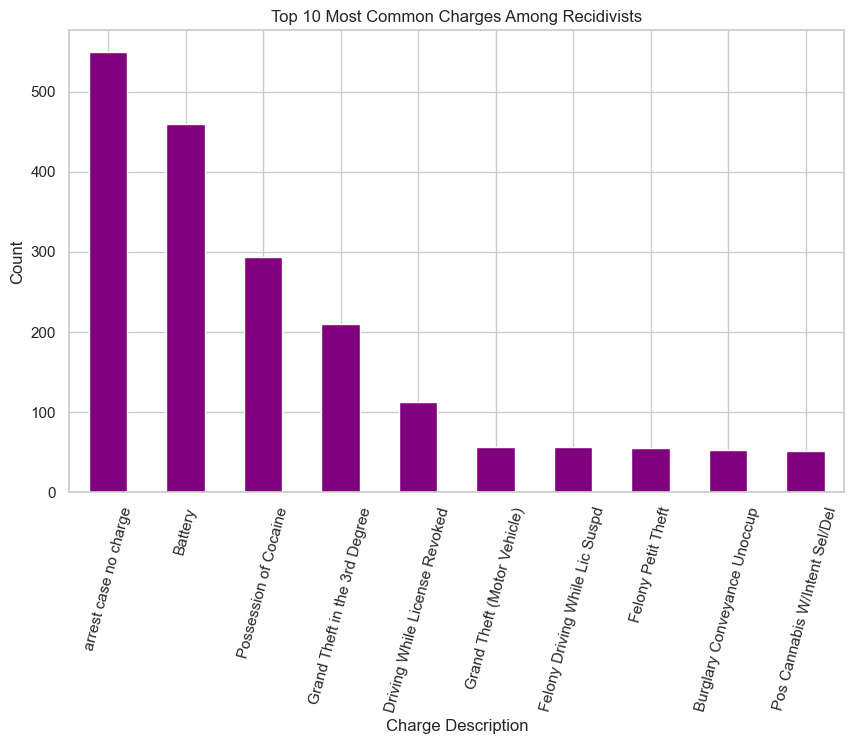

In [26]:
# Bar Chart of Most Common Offenses Among Recidivists
plt.figure(figsize=(10,6))
recid_charges = df[df["is_recid"] == 1]["c_charge_desc"].value_counts().nlargest(10)
recid_charges.plot(kind="bar", color="purple")
plt.title("Top 10 Most Common Charges Among Recidivists")
plt.xlabel("Charge Description")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()

Displays the most common charges among those who reoffended.

C:\Users\timio\AppData\Local\Temp\ipykernel_7928\3003410232.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["screening_date"] = pd.to_datetime(df["screening_date"], errors="coerce")
C:\Users\timio\AppData\Local\Temp\ipykernel_7928\3003410232.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="screening_date", y="recid_count", ci=None, color="darkred")


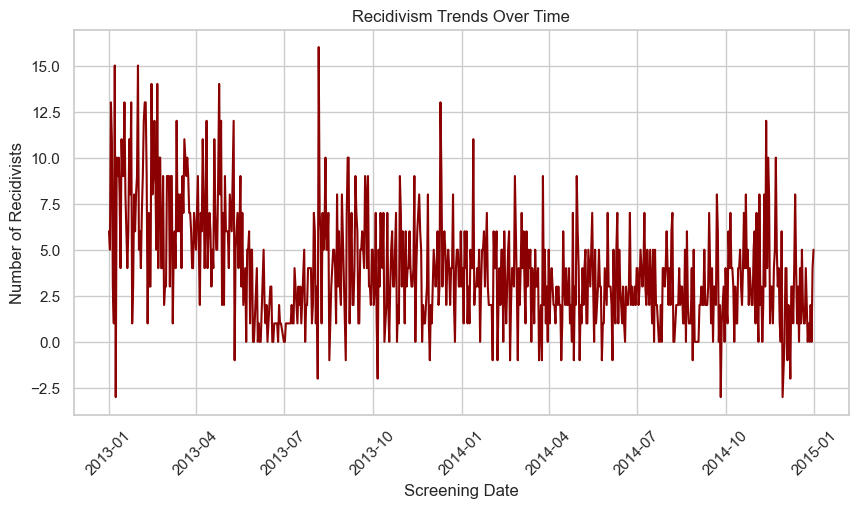

In [27]:
# Timeline of Recidivism Events (if timestamps are available)
if "screening_date" in df.columns:
    df["screening_date"] = pd.to_datetime(df["screening_date"], errors="coerce")
    df["recid_count"] = df.groupby("screening_date")["is_recid"].transform("sum")
    plt.figure(figsize=(10,5))
    sns.lineplot(data=df, x="screening_date", y="recid_count", ci=None, color="darkred")
    plt.title("Recidivism Trends Over Time")
    plt.xlabel("Screening Date")
    plt.ylabel("Number of Recidivists")
    plt.xticks(rotation=45)
    plt.show()

Tracks recidivism patterns over time.